In [36]:
#import required libreries
from __future__ import print_function
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [37]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [38]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [39]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))

In [40]:
#getting train data
mat_data = scipy.io.loadmat(r"C:\Users\Dell\OneDrive\Desktop\himi\btp\dataverse_files\purified_cric1\train.mat")
mat_variable = mat_data['traindata']
data_array = np.array(mat_variable)
column_names = [f'C{i}' for i in range(1, data_array.shape[1] + 1)]
train = pd.DataFrame(data_array, columns=column_names)
train.rename(columns={'C10': 'Class_label'},inplace=True)
show_basic_dataframe_info(train)

Number of rows in the dataframe: 5184000

Number of columns in the dataframe: 10


In [41]:
#Get test data
mat_data = scipy.io.loadmat(r"C:\Users\Dell\OneDrive\Desktop\himi\btp\dataverse_files\purified_cric1\test.mat")
mat_variable = mat_data['testdata']
data_array = np.array(mat_variable)
column_names = [f'C{i}' for i in range(1, data_array.shape[1] + 1)]
test = pd.DataFrame(data_array, columns=column_names)
test.rename(columns={'C10': 'Class_label'},inplace=True)
show_basic_dataframe_info(test)

Number of rows in the dataframe: 576000

Number of columns in the dataframe: 10


In [42]:
train.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,Class_label
0,-1.226116,0.628386,0.915431,-2.431641,2.453452,0.309312,0.627014,-1.829946,-0.318311,1.0
1,-1.531310,0.933581,1.831014,-1.210864,3.369035,-0.606271,0.627014,-1.524752,-0.623506,1.0
2,-0.920921,0.323192,2.441403,0.009914,4.895007,-1.521854,0.016625,0.001220,-0.013117,1.0
3,-0.005338,0.017997,1.525820,0.009914,4.589813,-0.911465,-0.593764,0.306415,-0.013117,1.0
4,0.299856,-0.592391,0.305042,-0.600475,1.537869,0.004118,-0.593764,0.001220,-0.013117,1.0


In [43]:
test.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,Class_label
0,0.0,-0.081599,0.0,0.638605,-2.863581,-0.314803,0.0,-2.763374,0.0,1.0
1,0.0,-1.912765,0.0,0.028216,-2.253192,0.295586,0.0,-2.152986,0.0,1.0
2,0.0,-2.828348,0.0,-0.582172,-1.642803,1.821558,0.0,-2.763374,0.0,1.0
3,0.0,-2.217960,0.0,-0.276978,-1.032414,3.347530,0.0,-3.373763,0.0,1.0
4,0.0,-1.302376,0.0,1.248994,-0.727220,3.347530,0.0,-2.458180,0.0,1.0


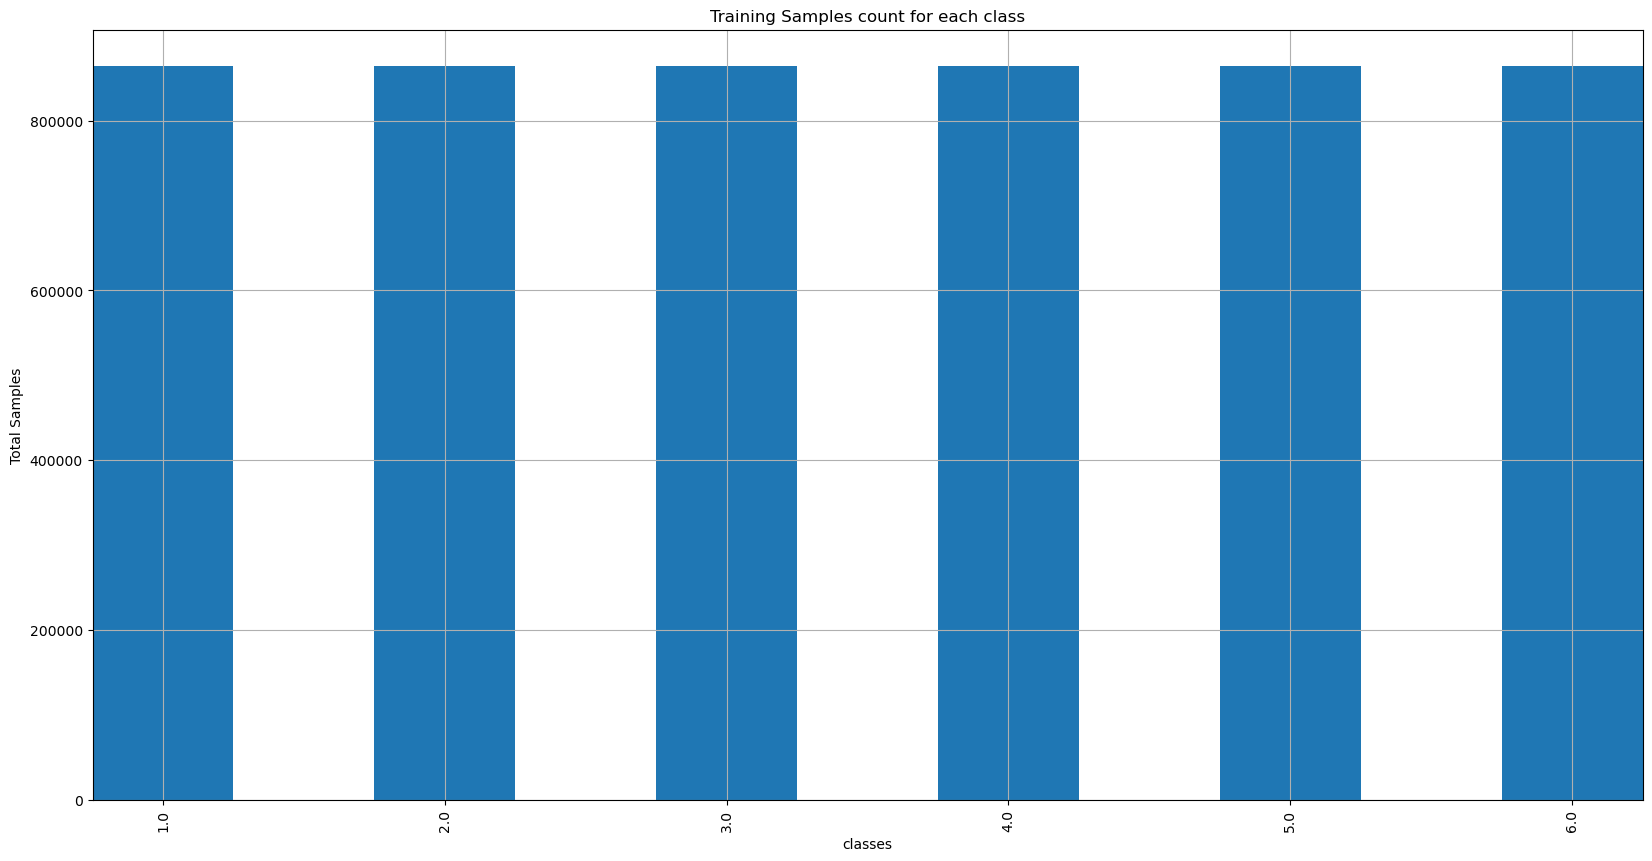

In [44]:
train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

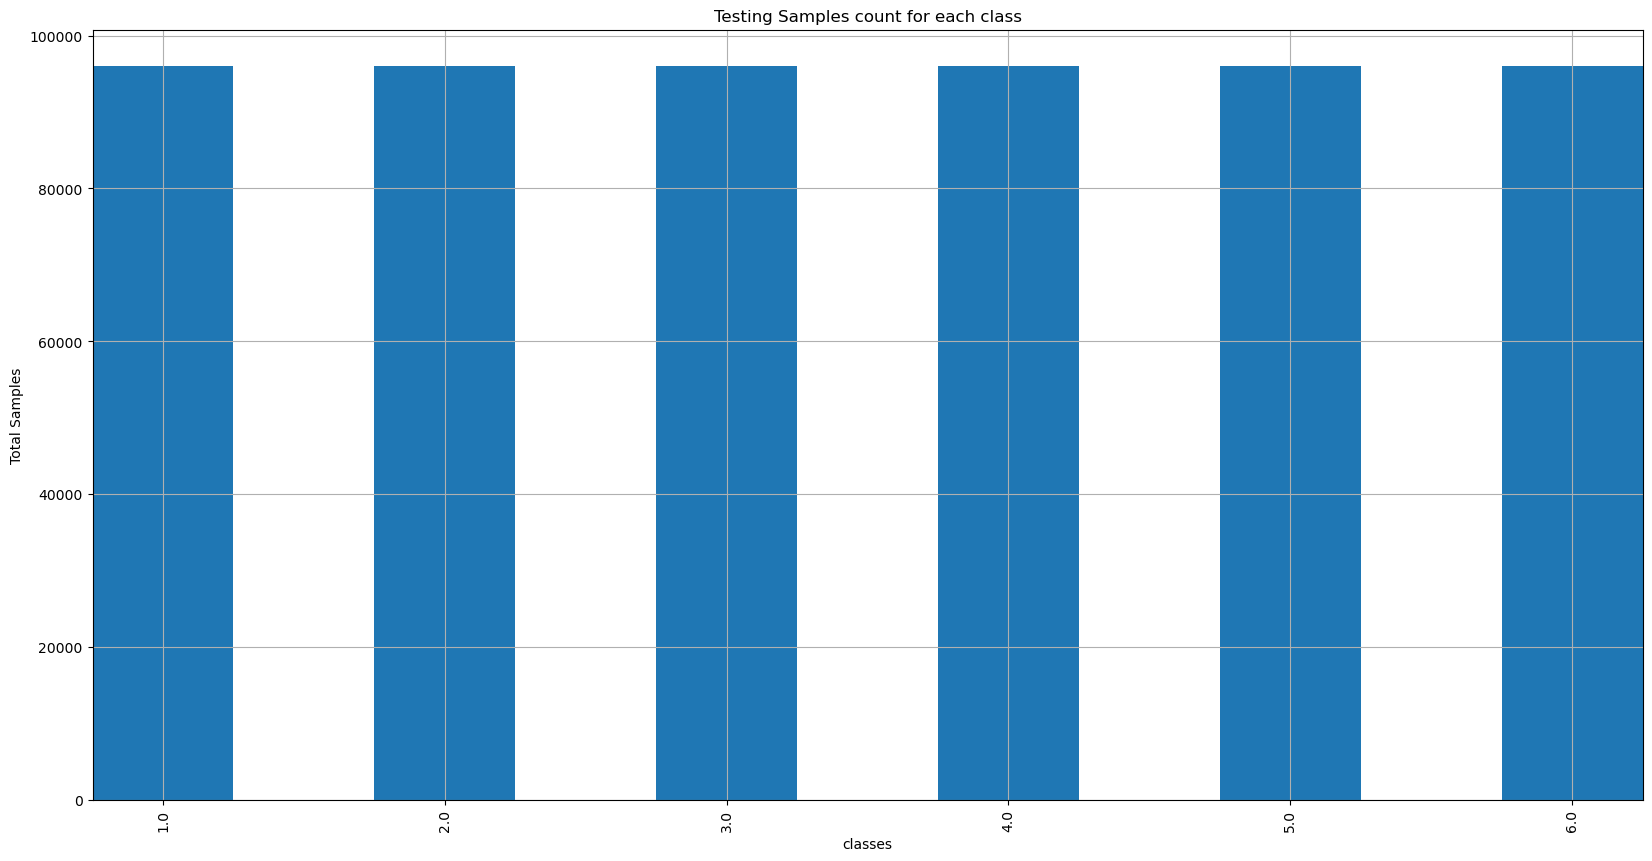

In [45]:
test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [46]:
N_FEATURES = 9
scaler = preprocessing.StandardScaler().fit(train.iloc[:,0:N_FEATURES])

In [47]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
train[LABEL] = le.fit_transform(train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
test[LABEL] = le.fit_transform(test['Class_label'].values.ravel())
print('df_train_size',train)
# print('df_valid_size',df_Valid)
print('df_test_size',test)

df_train_size                C1        C2        C3        C4        C5        C6  \
0       -1.226116  0.628386  0.915431 -2.431641  2.453452  0.309312   
1       -1.531310  0.933581  1.831014 -1.210864  3.369035 -0.606271   
2       -0.920921  0.323192  2.441403  0.009914  4.895007 -1.521854   
3       -0.005338  0.017997  1.525820  0.009914  4.589813 -0.911465   
4        0.299856 -0.592391  0.305042 -0.600475  1.537869  0.004118   
...           ...       ...       ...       ...       ...       ...   
5183995 -3.999862 -1.235877  0.305042  8.220269  0.945630  0.347443   
5183996 -2.168695 -0.625488  0.305042  7.304686  1.556019  0.042248   
5183997 -0.947918 -0.015100 -0.610541  5.473519  0.945630 -1.178529   
5183998 -1.253112  0.900484 -0.610541  4.863130 -0.275148 -1.788918   
5183999 -1.558306  0.900484  0.610236  6.389102 -1.190731 -1.178529   

                C7        C8        C9  Class_label  ActivityEncoded  
0         0.627014 -1.829946 -0.318311          1.0           

In [48]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [49]:
# The number of steps within one time segment
TIME_PERIODS = 1000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 1000

In [50]:
x_train, y_train = create_segments_and_labels(train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18572\889263851.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df[label_name][i: i + time_steps])[0][0]


x_train shape:  (5183, 1000, 9)
5183 training samples
y_train shape:  (5183,)
1000
9
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
x_train shape: (1000, 9)
input_shape: (1000, 9)
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]
New y_train shape:  (5183, 6)


In [51]:
x_test, y_test = create_segments_and_labels(test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18572\889263851.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df[label_name][i: i + time_steps])[0][0]


x_test shape:  (575, 1000, 9)
575 testing samples
y_test shape:  (575,)


In [52]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 40, 25
n_depth=9
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (5183, 40, 25, 9)
x_test shape:  (575, 40, 25, 9)
n_outputs 6


In [53]:
def step_decay(epoch):
   initial_lrate = 1e-3
   drop = 0.1
   epochs_drop = 70.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [54]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [55]:
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

[1, 2, 3, 4, 5, 6]


In [56]:
verbose, epochs, batch_size = 0, 200,512

In [57]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Flatten()))
# model.add(Flatten())
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Flatten())
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.3))
model.add(Dense(2000, activation='tanh'))
model.add(Dense(512, activation='tanh'))
# model.add(Dense(200, activation='tanh'))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Dense(n_outputs, activation='softmax'))

In [58]:
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
adam=optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
#model.build(input_shape=(n_steps, n_length, n_depth))
# sgd=optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=False, name='SGD')
checkpoint_filepath = r"C:\Users\Dell\OneDrive\Desktop\himi\btp\dataverse_files\checkpoint.hdf5"
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 40, 13, 64)       5248      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 40, 13, 64)       256       
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 40, 3, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 40, 3, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 40, 2, 64)       

In [59]:
#     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
csv_logger = CSVLogger(r'C:\Users\Dell\OneDrive\Desktop\himi\btp\dataverse_files\purified_cric1\telidu.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/200
11/11 [==============================] - ETA: 0s - loss: 4.4005 - accuracy: 0.1868
Epoch 1: val_accuracy improved from -inf to 0.17043, saving model to C:\Users\Dell\OneDrive\Desktop\himi\btp\dataverse_files\checkpoint.hdf5
11/11 [==============================] - 78s 5s/step - loss: 4.4005 - accuracy: 0.1868 - val_loss: 2.4961 - val_accuracy: 0.1704 - lr: 0.0010
Epoch 2/200
11/11 [==============================] - ETA: 0s - loss: 2.2420 - accuracy: 0.1879
Epoch 2: val_accuracy did not improve from 0.17043
11/11 [==============================] - 50s 5s/step - loss: 2.2420 - accuracy: 0.1879 - val_loss: 2.3164 - val_accuracy: 0.1548 - lr: 0.0010
Epoch 3/200
11/11 [==============================] - ETA: 0s - loss: 2.1615 - accuracy: 0.2207
Epoch 3: val_accuracy did not improve from 0.17043
11/11 [==============================] - 59s 5s/step - loss: 2.1615 - accuracy: 0.2207 - val_loss: 2.2562 - val_accuracy: 0.1513 - lr: 0.0010
Epoch 4/200
11/11 [===========================

11/11 [==============================] - 66s 6s/step - loss: 1.5918 - accuracy: 0.4517 - val_loss: 3.3979 - val_accuracy: 0.1426 - lr: 0.0010
Epoch 29/200
11/11 [==============================] - ETA: 0s - loss: 1.5487 - accuracy: 0.4769
Epoch 29: val_accuracy did not improve from 0.23652
11/11 [==============================] - 72s 7s/step - loss: 1.5487 - accuracy: 0.4769 - val_loss: 3.7300 - val_accuracy: 0.1791 - lr: 0.0010
Epoch 30/200
11/11 [==============================] - ETA: 0s - loss: 1.5155 - accuracy: 0.4814
Epoch 30: val_accuracy did not improve from 0.23652
11/11 [==============================] - 68s 6s/step - loss: 1.5155 - accuracy: 0.4814 - val_loss: 3.7826 - val_accuracy: 0.1426 - lr: 0.0010
Epoch 31/200
11/11 [==============================] - ETA: 0s - loss: 1.4912 - accuracy: 0.4962
Epoch 31: val_accuracy did not improve from 0.23652
11/11 [==============================] - 65s 6s/step - loss: 1.4912 - accuracy: 0.4962 - val_loss: 4.9138 - val_accuracy: 0.1009 -

Epoch 57/200
11/11 [==============================] - ETA: 0s - loss: 0.8292 - accuracy: 0.7727
Epoch 57: val_accuracy did not improve from 0.23652
11/11 [==============================] - 59s 5s/step - loss: 0.8292 - accuracy: 0.7727 - val_loss: 6.0628 - val_accuracy: 0.1652 - lr: 0.0010
Epoch 58/200
11/11 [==============================] - ETA: 0s - loss: 0.8117 - accuracy: 0.7880
Epoch 58: val_accuracy did not improve from 0.23652
11/11 [==============================] - 75s 7s/step - loss: 0.8117 - accuracy: 0.7880 - val_loss: 6.6406 - val_accuracy: 0.1635 - lr: 0.0010
Epoch 59/200
11/11 [==============================] - ETA: 0s - loss: 0.7743 - accuracy: 0.8001
Epoch 59: val_accuracy did not improve from 0.23652
11/11 [==============================] - 75s 7s/step - loss: 0.7743 - accuracy: 0.8001 - val_loss: 6.9294 - val_accuracy: 0.1617 - lr: 0.0010
Epoch 60/200
11/11 [==============================] - ETA: 0s - loss: 0.7627 - accuracy: 0.7992
Epoch 60: val_accuracy did not imp

11/11 [==============================] - ETA: 0s - loss: 0.4086 - accuracy: 0.9361
Epoch 85: val_accuracy did not improve from 0.23652
11/11 [==============================] - 70s 6s/step - loss: 0.4086 - accuracy: 0.9361 - val_loss: 4.7658 - val_accuracy: 0.1530 - lr: 1.0000e-04
Epoch 86/200
11/11 [==============================] - ETA: 0s - loss: 0.3969 - accuracy: 0.9444
Epoch 86: val_accuracy did not improve from 0.23652
11/11 [==============================] - 65s 6s/step - loss: 0.3969 - accuracy: 0.9444 - val_loss: 5.5584 - val_accuracy: 0.1548 - lr: 1.0000e-04
Epoch 87/200
11/11 [==============================] - ETA: 0s - loss: 0.3927 - accuracy: 0.9425
Epoch 87: val_accuracy did not improve from 0.23652
11/11 [==============================] - 65s 6s/step - loss: 0.3927 - accuracy: 0.9425 - val_loss: 5.2952 - val_accuracy: 0.1600 - lr: 1.0000e-04
Epoch 88/200
11/11 [==============================] - ETA: 0s - loss: 0.3870 - accuracy: 0.9479
Epoch 88: val_accuracy did not impr

In [60]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 14
train accuracy and validation accuracy 0.2886359393596649 0.23652173578739166


history loss
history accuracy
history val_loss
history val_accuracy
history lr


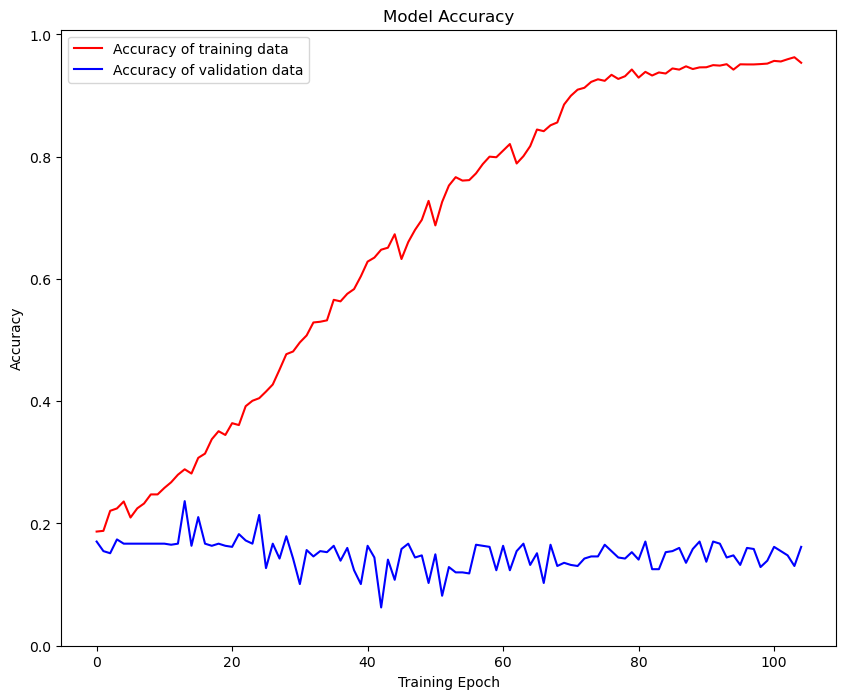

In [61]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy
history lr


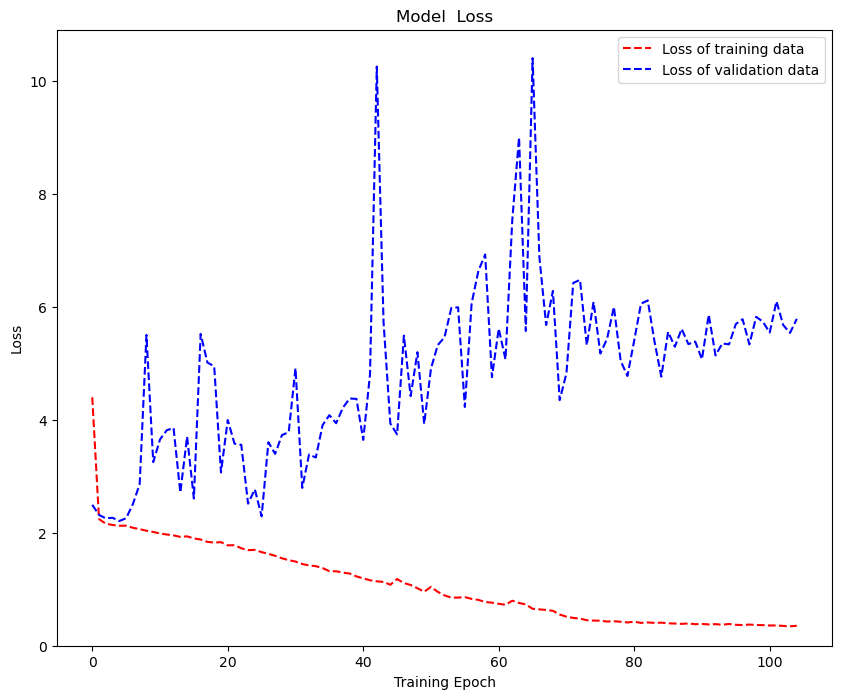

In [62]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [63]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

2/2 [==============================] - 2s 245ms/step - loss: 2.7119 - accuracy: 0.2365
test_accuracy 0.23652173578739166


162/162 [==============================] - 35s 163ms/step


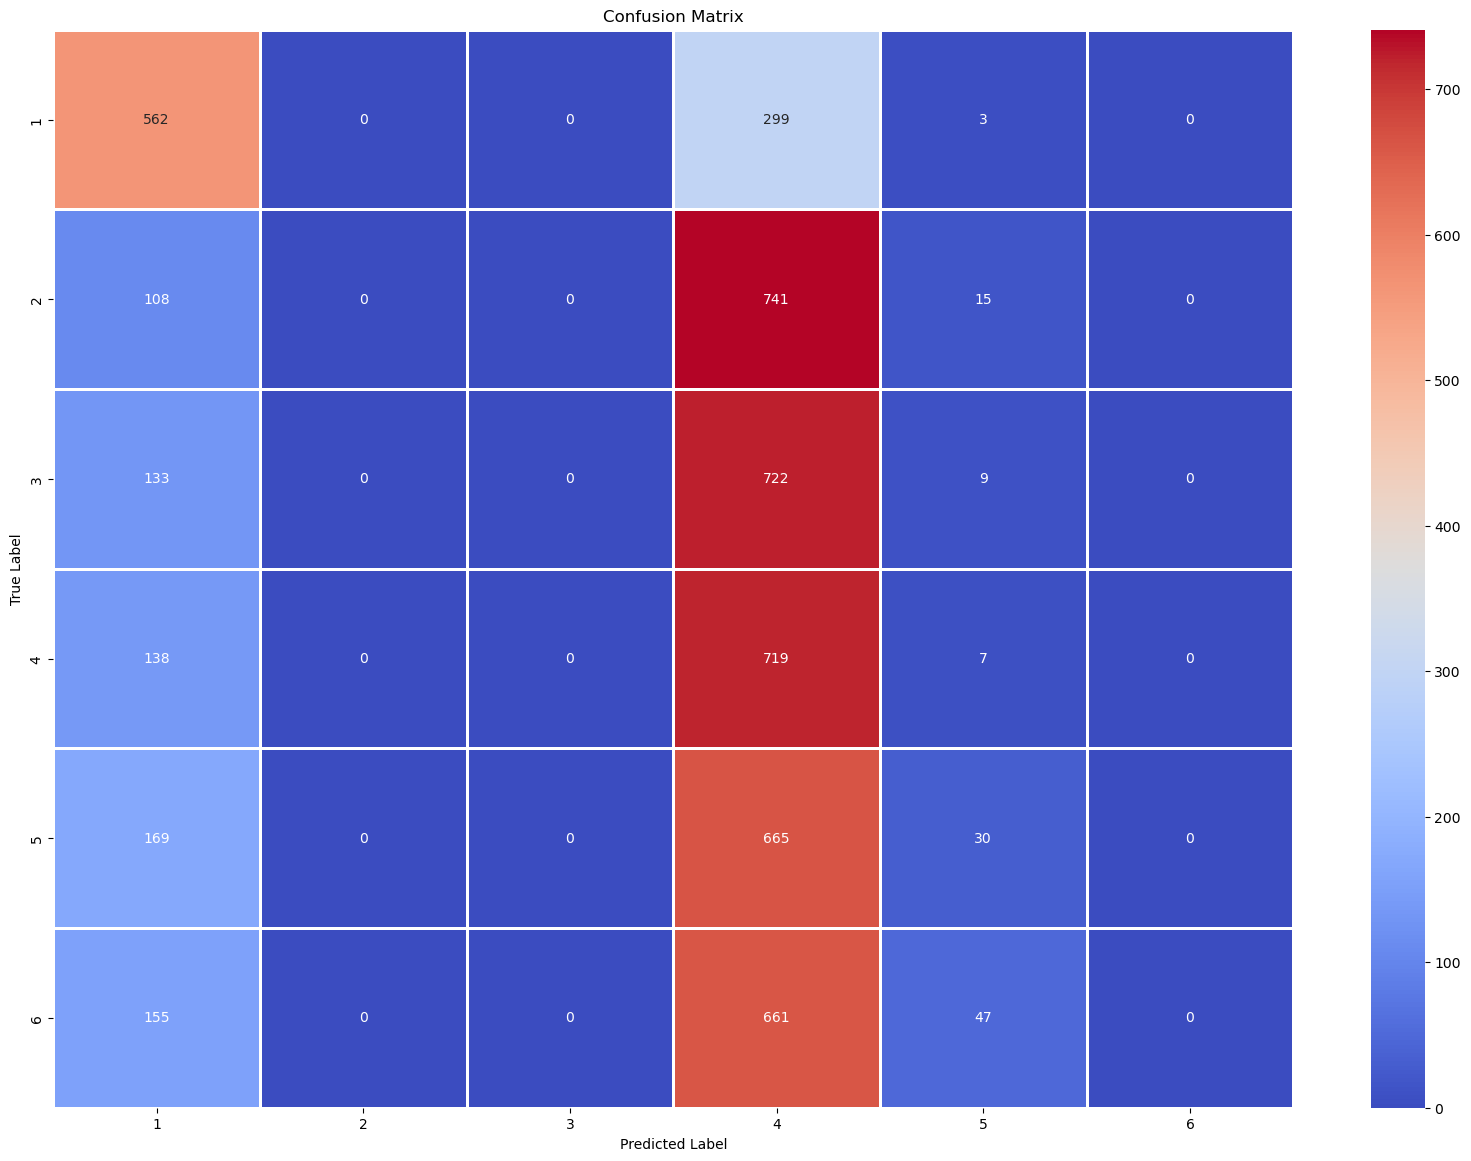

              precision    recall  f1-score   support

           0       0.44      0.65      0.53       864
           1       0.00      0.00      0.00       864
           2       0.00      0.00      0.00       864
           3       0.19      0.83      0.31       864
           4       0.27      0.03      0.06       864
           5       0.00      0.00      0.00       863

    accuracy                           0.25      5183
   macro avg       0.15      0.25      0.15      5183
weighted avg       0.15      0.25      0.15      5183



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

18/18 [==============================] - 3s 157ms/step


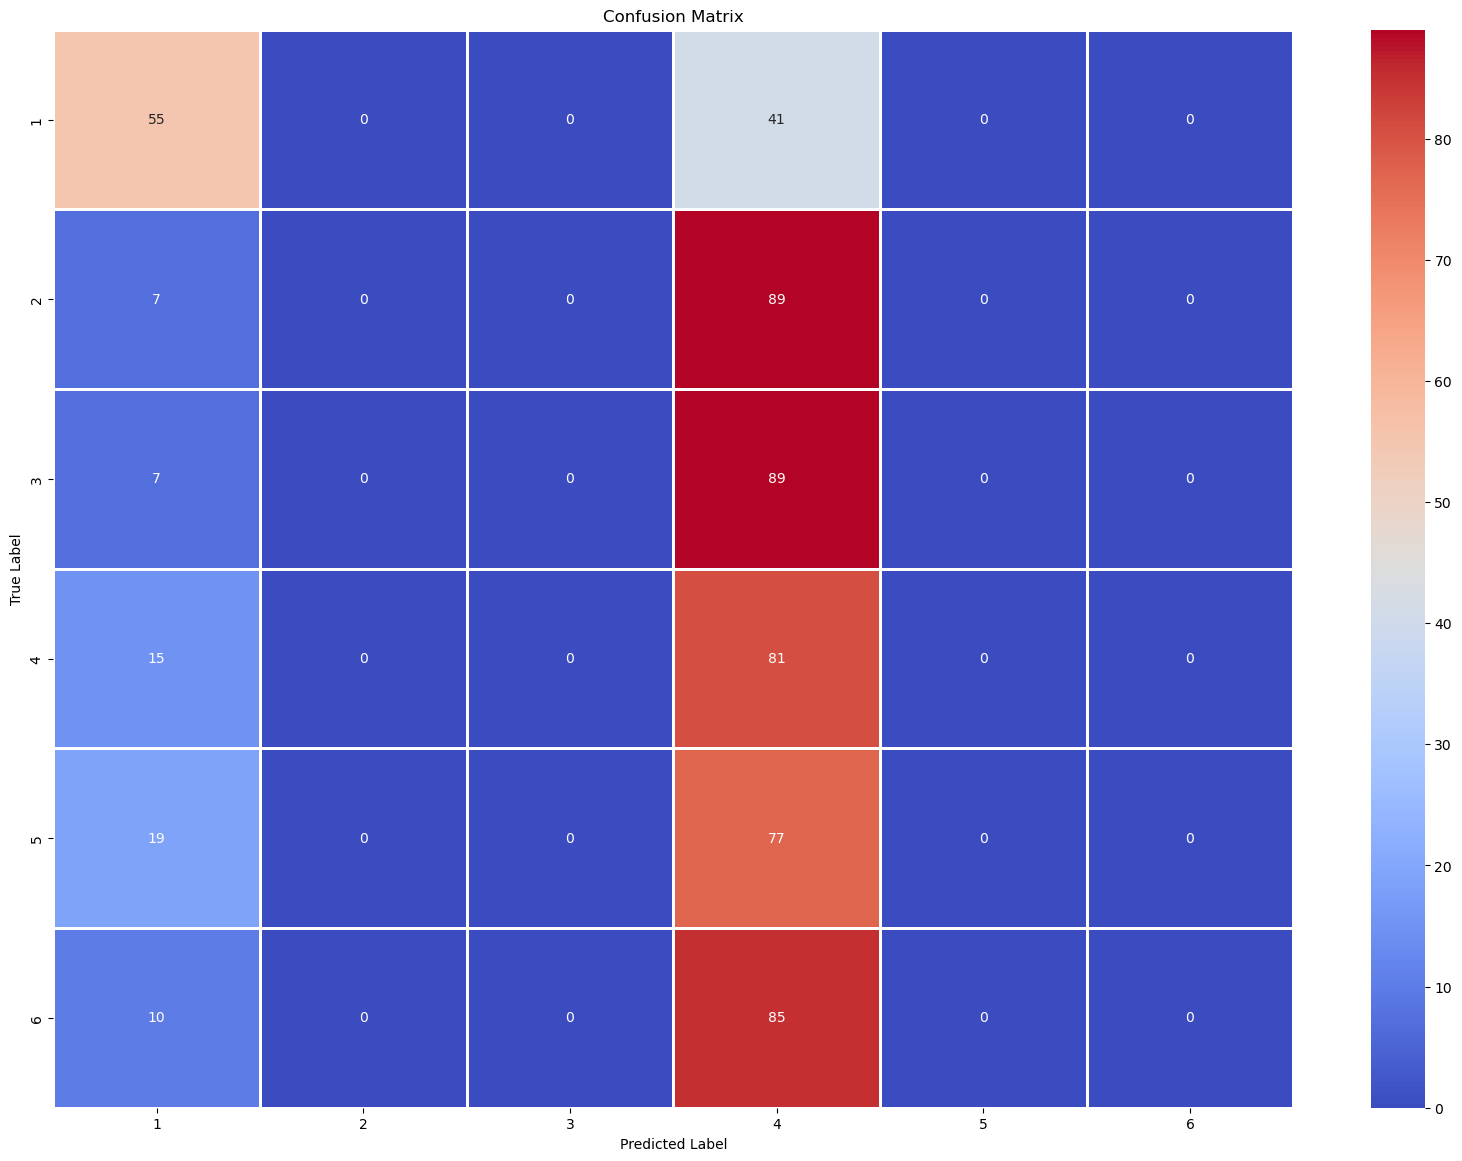

              precision    recall  f1-score   support

           0       0.49      0.57      0.53        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        96
           3       0.18      0.84      0.29        96
           4       0.00      0.00      0.00        96
           5       0.00      0.00      0.00        95

    accuracy                           0.24       575
   macro avg       0.11      0.24      0.14       575
weighted avg       0.11      0.24      0.14       575



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))